# Peak Detection
This notebook is made for detecting peaks of the snippets extracted in module 2 using the function defined in x


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [5]:
%run "Functions_peakdetection.ipynb"

In [1]:
root = 'G:\My Drive\Molecool\Databases\Database1'

In [31]:
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini')):
        path_pat = root+'\\'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini'):
                path_folder = path_pat + '\\' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini')):
                        path_snip =path_folder + '\\' + snip_folder
                        read_meta(path_snip)
                        read_peaks(path_snip, samplingRate)
     



  0%|                                                                                           | 0/57 [00:00<?, ?it/s]

  4%|██▉                                                                                | 2/57 [00:01<00:48,  1.14it/s]

  7%|█████▊                                                                             | 4/57 [00:02<00:37,  1.42it/s]

 11%|████████▋                                                                          | 6/57 [00:05<00:52,  1.02s/it]

 12%|██████████▏                                                                        | 7/57 [00:08<01:11,  1.43s/it]

 14%|███████████▋                                                                       | 8/57 [00:17<03:05,  3.78s/it]

 16%|█████████████                                                                      | 9/57 [00:23<03:35,  4.49s/it]

 18%|██████████████▍                                                                   | 10/57 [00:30<04:00,  5.13s/it]

 19%|███████████████▊         

In [8]:
def read_peaks(path,rate):
    """Function to open snippet files, get peaks, and write them to a new file"""
    df = pd.read_feather(path_snip + '\\MSNIP.ftr')   #inputting the ecg feather files in a data frame
    df = _filteringdet(df['ecg_0'],rate)
    feather.write_feather(df, (path_snip + '\\PEAKS.ftr'))

In [26]:
def read_meta(path):
    """Function that creates a new meta file for peak files"""
#     with open(path + '\ManualMeta.json') as json_file:
#         metaData = json.load(json_file)
#         json_file.close()
    data = {'Error Flag': False, 'Error Type': 'No error'}
    with open((path + '\\PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [30]:
def find_rate(path):
    """"""
    with open(path + '\Meta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return int(metaData['Sampling rate'])







  0%|                                                                                           | 0/57 [00:00<?, ?it/s]

G:\My Drive\Molecool\Databases\Database1\S0250\holter\Snippet000


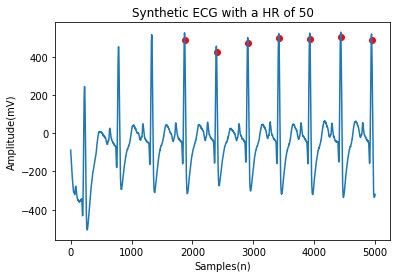

G:\My Drive\Molecool\Databases\Database1\S0250\holter\Snippet001


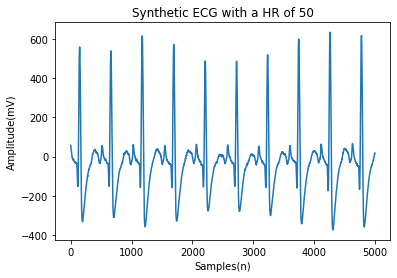

G:\My Drive\Molecool\Databases\Database1\S0250\holter\Snippet002


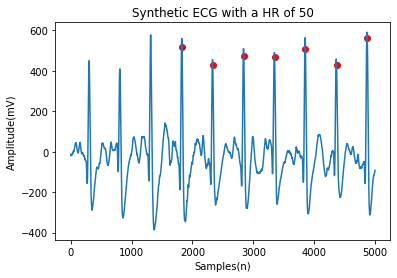







  4%|██▉                                                                                | 2/57 [00:00<00:13,  4.01it/s]

G:\My Drive\Molecool\Databases\Database1\S0256\holter\Snippet000


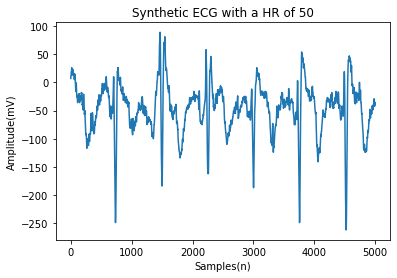







  7%|█████▊                                                                             | 4/57 [00:00<00:10,  4.90it/s]

G:\My Drive\Molecool\Databases\Database1\S0273\holter\Snippet000


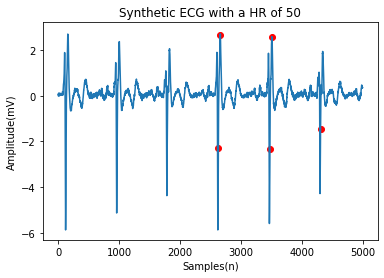

G:\My Drive\Molecool\Databases\Database1\S0273\holter\Snippet001


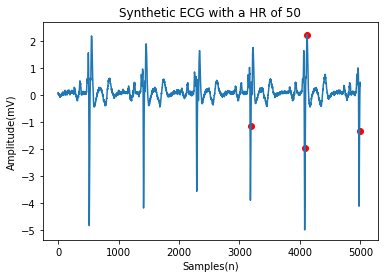

G:\My Drive\Molecool\Databases\Database1\S0273\holter\Snippet002


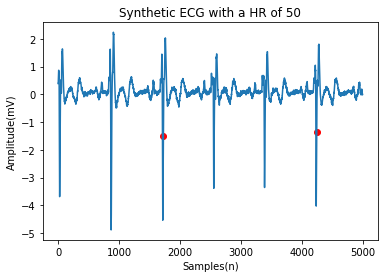

G:\My Drive\Molecool\Databases\Database1\S0273\holter\Snippet003


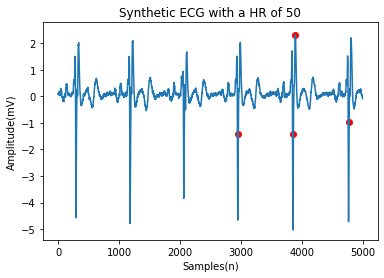

G:\My Drive\Molecool\Databases\Database1\S0273\holter\Snippet004


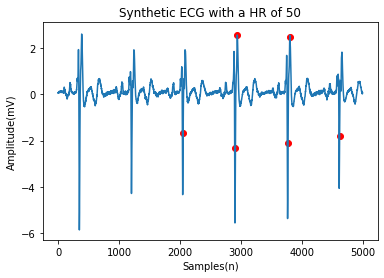







 11%|████████▋                                                                          | 6/57 [00:01<00:14,  3.50it/s]

G:\My Drive\Molecool\Databases\Database1\S0282\holter\Snippet000


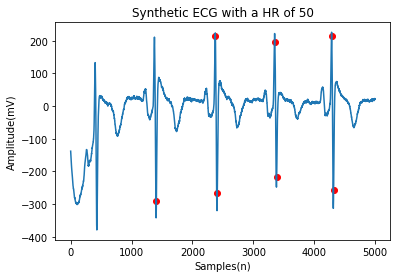

G:\My Drive\Molecool\Databases\Database1\S0282\holter\Snippet001


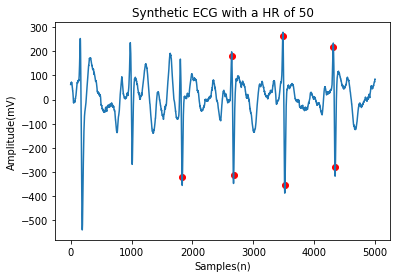

G:\My Drive\Molecool\Databases\Database1\S0282\holter\Snippet002


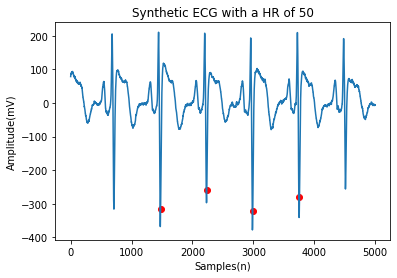







 12%|██████████▏                                                                        | 7/57 [00:02<00:16,  2.95it/s]

G:\My Drive\Molecool\Databases\Database1\S0283\holter\Snippet000


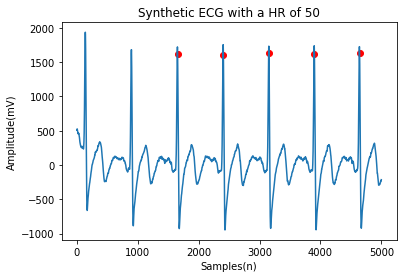

G:\My Drive\Molecool\Databases\Database1\S0283\holter\Snippet001


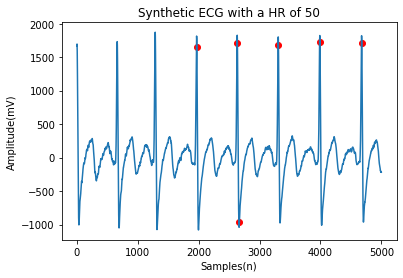

G:\My Drive\Molecool\Databases\Database1\S0283\holter\Snippet002


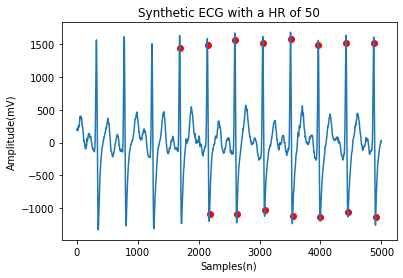

G:\My Drive\Molecool\Databases\Database1\S0283\holter\Snippet003


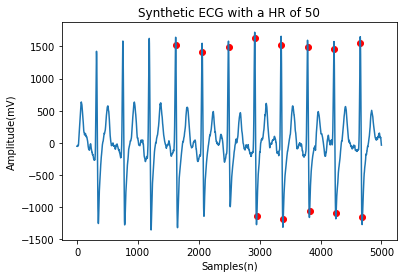







 14%|███████████▋                                                                       | 8/57 [00:02<00:20,  2.42it/s]

G:\My Drive\Molecool\Databases\Database1\S0287\holter\Snippet000


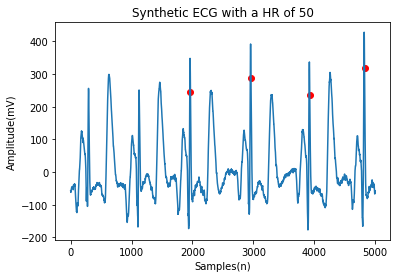

G:\My Drive\Molecool\Databases\Database1\S0287\holter\Snippet001


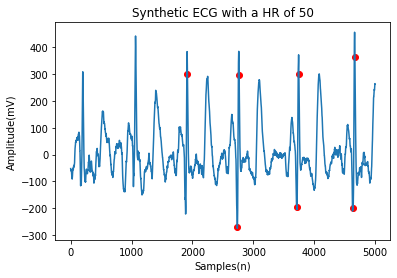

G:\My Drive\Molecool\Databases\Database1\S0287\holter\Snippet002


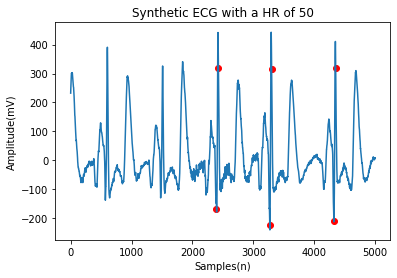







 16%|█████████████                                                                      | 9/57 [00:03<00:21,  2.21it/s]

G:\My Drive\Molecool\Databases\Database1\S0288\holter\Snippet000


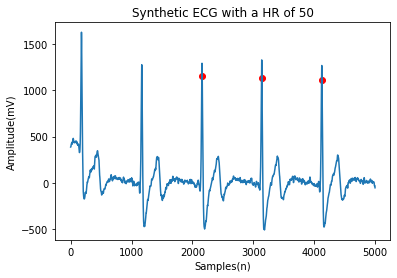

G:\My Drive\Molecool\Databases\Database1\S0288\holter\Snippet001


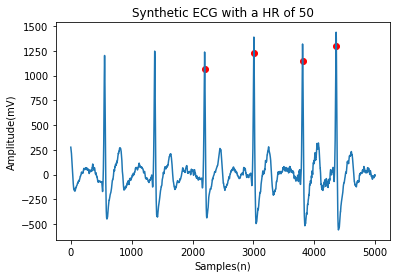

G:\My Drive\Molecool\Databases\Database1\S0288\holter\Snippet002


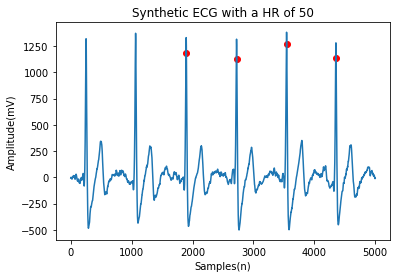







 18%|██████████████▍                                                                   | 10/57 [00:03<00:21,  2.23it/s]

G:\My Drive\Molecool\Databases\Database1\S0292\holter\Snippet000


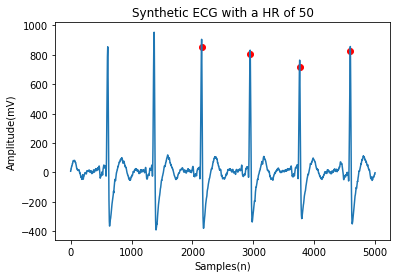

G:\My Drive\Molecool\Databases\Database1\S0292\holter\Snippet001


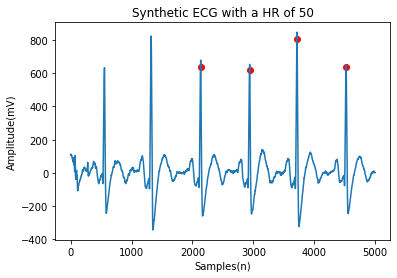







 19%|███████████████▊                                                                  | 11/57 [00:04<00:19,  2.42it/s]

G:\My Drive\Molecool\Databases\Database1\S0296\holter\Snippet000


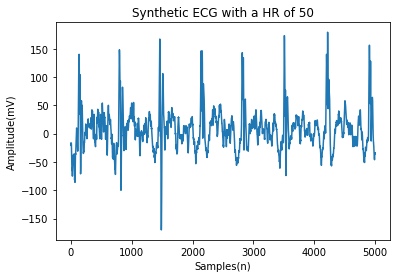

G:\My Drive\Molecool\Databases\Database1\S0296\holter\Snippet001


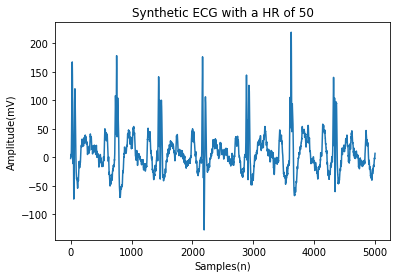

G:\My Drive\Molecool\Databases\Database1\S0296\holter\Snippet002


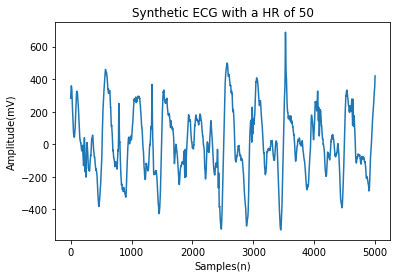







 21%|█████████████████▎                                                                | 12/57 [00:04<00:18,  2.40it/s]

G:\My Drive\Molecool\Databases\Database1\S0300\holter\Snippet000


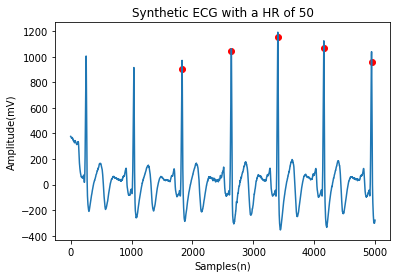

G:\My Drive\Molecool\Databases\Database1\S0300\holter\Snippet001


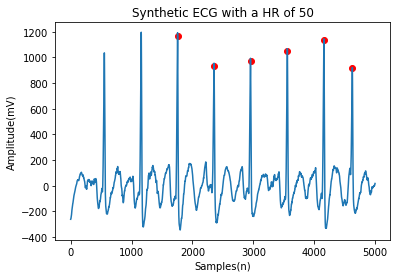

G:\My Drive\Molecool\Databases\Database1\S0300\holter\Snippet002


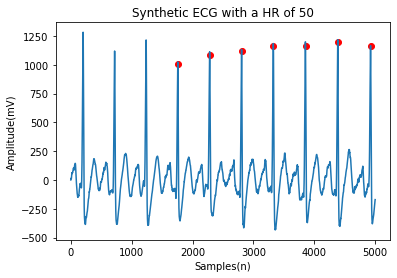







 23%|██████████████████▋                                                               | 13/57 [00:04<00:19,  2.30it/s]

G:\My Drive\Molecool\Databases\Database1\S0301\holter\Snippet000


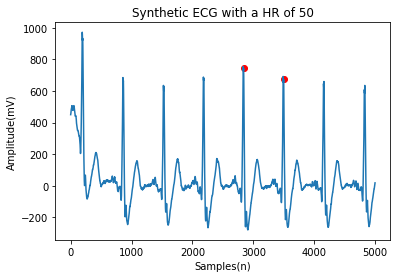

G:\My Drive\Molecool\Databases\Database1\S0301\holter\Snippet001


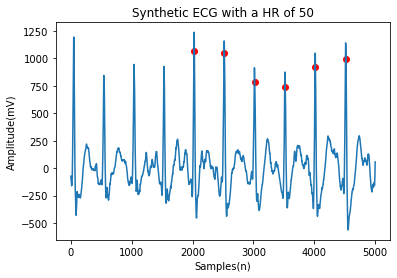

G:\My Drive\Molecool\Databases\Database1\S0301\holter\Snippet002


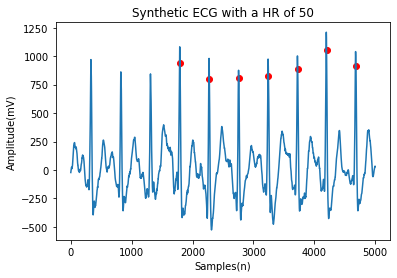







 25%|████████████████████▏                                                             | 14/57 [00:05<00:20,  2.10it/s]

G:\My Drive\Molecool\Databases\Database1\S0304\holter\Snippet000


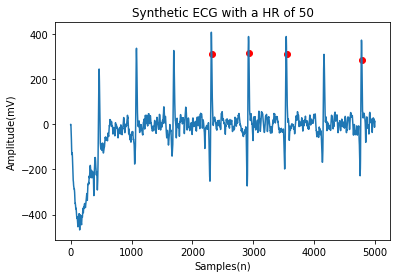







 26%|█████████████████████▌                                                            | 15/57 [00:05<00:19,  2.14it/s]

G:\My Drive\Molecool\Databases\Database1\S0308\holter\Snippet000


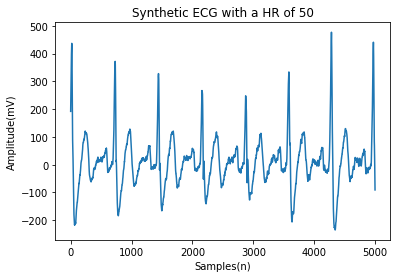







 28%|███████████████████████                                                           | 16/57 [00:06<00:15,  2.63it/s]

G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet000


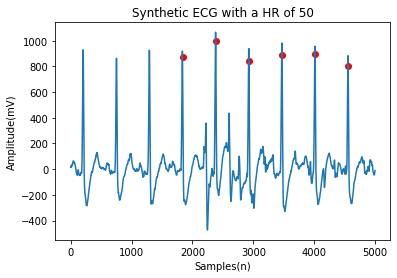

G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet001


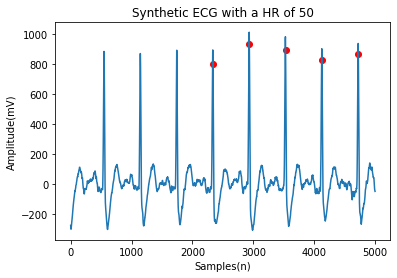

G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet002


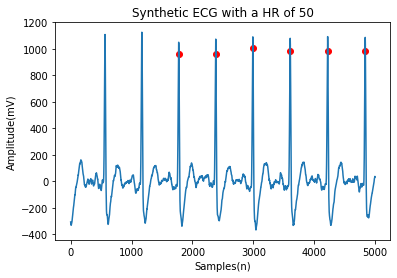

G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet003


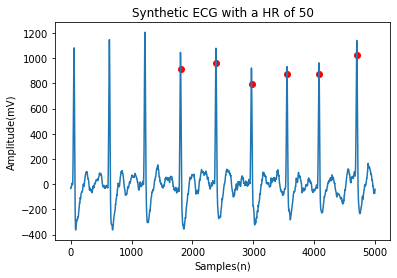

G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet004


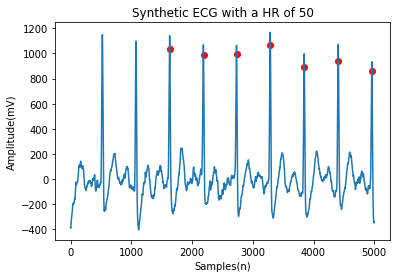







 30%|████████████████████████▍                                                         | 17/57 [00:06<00:20,  1.96it/s]

G:\My Drive\Molecool\Databases\Database1\S0312\holter\Snippet000


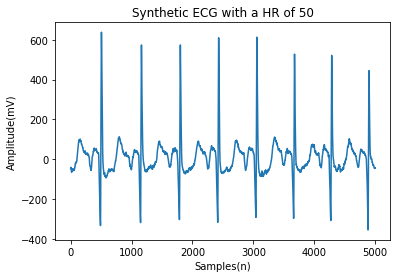







 32%|█████████████████████████▉                                                        | 18/57 [00:07<00:15,  2.49it/s]

G:\My Drive\Molecool\Databases\Database1\S0314\holter\Snippet000


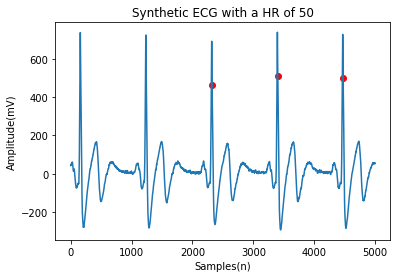

G:\My Drive\Molecool\Databases\Database1\S0314\holter\Snippet001


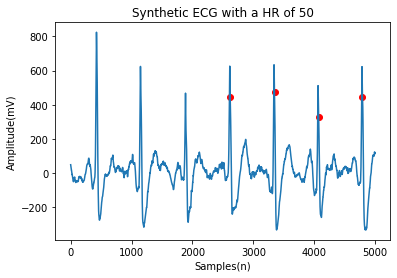







 33%|███████████████████████████▎                                                      | 19/57 [00:07<00:14,  2.66it/s]

G:\My Drive\Molecool\Databases\Database1\S0315\holter\Snippet000


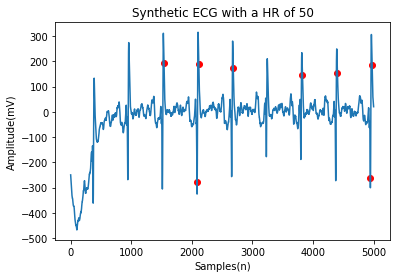







 35%|████████████████████████████▊                                                     | 20/57 [00:07<00:11,  3.23it/s]

G:\My Drive\Molecool\Databases\Database1\S0316\holter\Snippet000


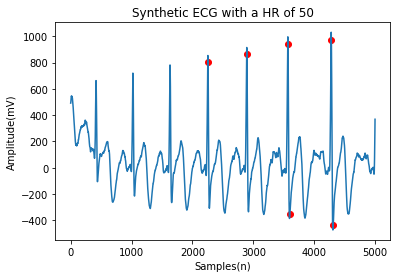

G:\My Drive\Molecool\Databases\Database1\S0316\holter\Snippet001


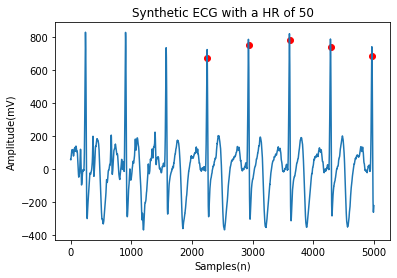

G:\My Drive\Molecool\Databases\Database1\S0316\holter\Snippet002


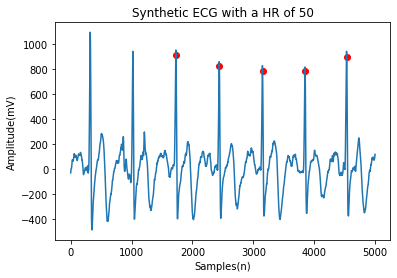

G:\My Drive\Molecool\Databases\Database1\S0316\holter\Snippet003


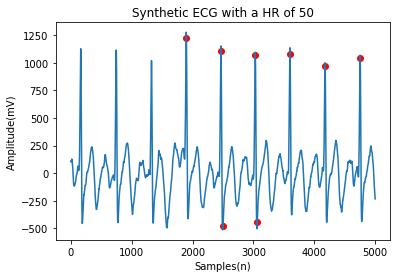







 37%|██████████████████████████████▏                                                   | 21/57 [00:08<00:15,  2.32it/s]

G:\My Drive\Molecool\Databases\Database1\S0317\holter\Snippet000


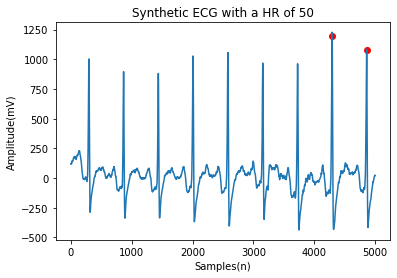

G:\My Drive\Molecool\Databases\Database1\S0317\holter\Snippet001


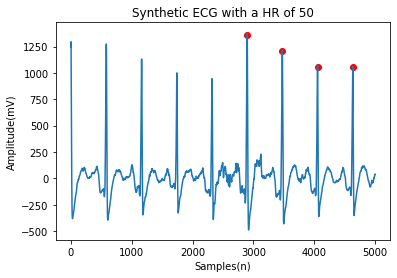

G:\My Drive\Molecool\Databases\Database1\S0317\holter\Snippet002


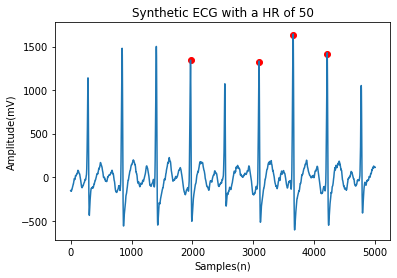

G:\My Drive\Molecool\Databases\Database1\S0317\holter\Snippet003


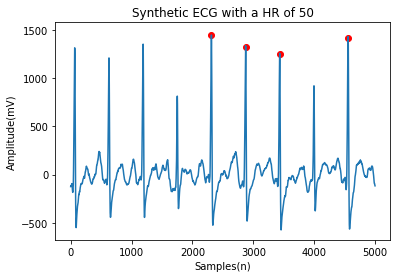







 39%|███████████████████████████████▋                                                  | 22/57 [00:08<00:16,  2.07it/s]

G:\My Drive\Molecool\Databases\Database1\S0318\holter\Snippet000


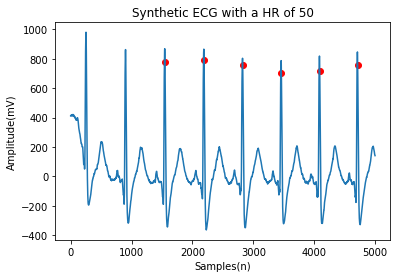

G:\My Drive\Molecool\Databases\Database1\S0318\holter\Snippet001


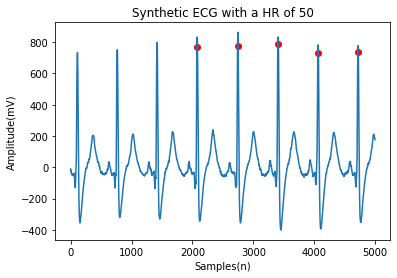

G:\My Drive\Molecool\Databases\Database1\S0318\holter\Snippet002


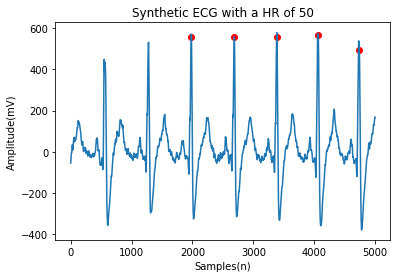







 40%|█████████████████████████████████                                                 | 23/57 [00:09<00:15,  2.15it/s]

G:\My Drive\Molecool\Databases\Database1\S0326\holter\Snippet000


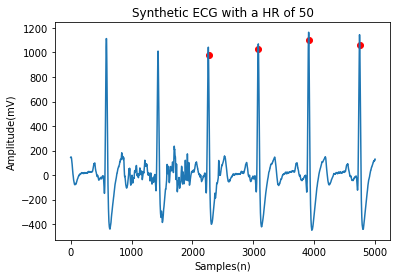

G:\My Drive\Molecool\Databases\Database1\S0326\holter\Snippet001


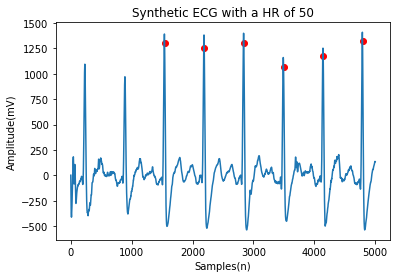

G:\My Drive\Molecool\Databases\Database1\S0326\holter\Snippet002


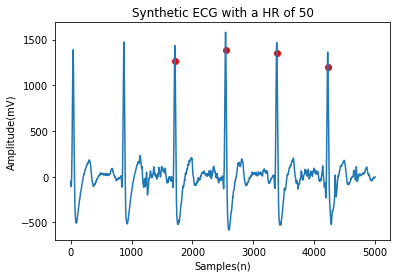







 42%|██████████████████████████████████▌                                               | 24/57 [00:09<00:15,  2.18it/s]

G:\My Drive\Molecool\Databases\Database1\S0342\holter\Snippet000


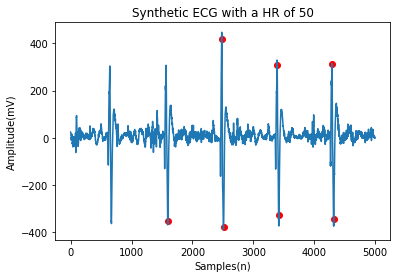

G:\My Drive\Molecool\Databases\Database1\S0342\holter\Snippet001


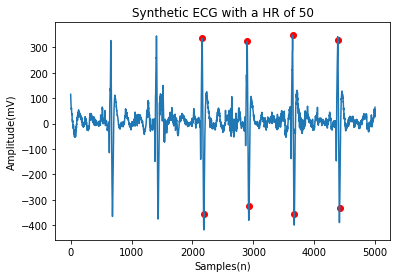







 49%|████████████████████████████████████████▎                                         | 28/57 [00:10<00:10,  2.90it/s]

G:\My Drive\Molecool\Databases\Database1\S0349\holter\Snippet000


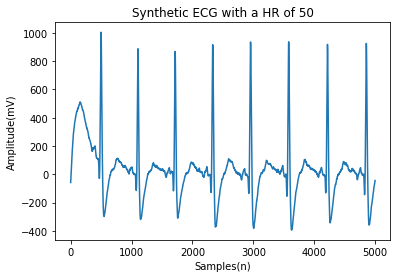







 51%|█████████████████████████████████████████▋                                        | 29/57 [00:10<00:08,  3.23it/s]

G:\My Drive\Molecool\Databases\Database1\S0365\holter\Snippet000


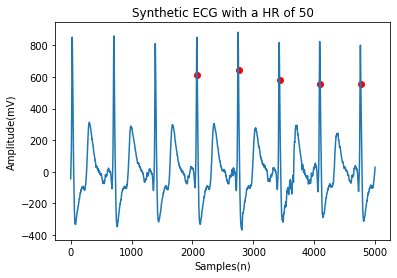

G:\My Drive\Molecool\Databases\Database1\S0365\holter\Snippet001


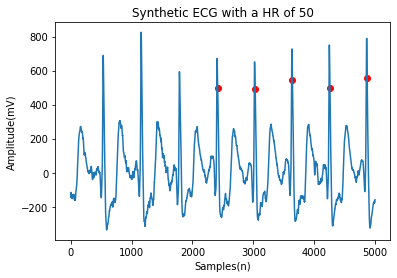

G:\My Drive\Molecool\Databases\Database1\S0365\holter\Snippet002


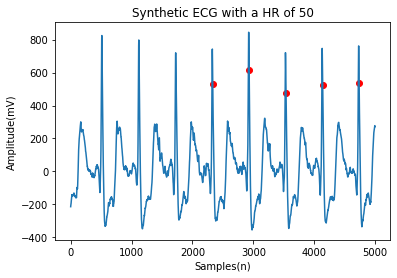







 53%|███████████████████████████████████████████▏                                      | 30/57 [00:10<00:09,  2.84it/s]

G:\My Drive\Molecool\Databases\Database1\S0366\holter\Snippet000


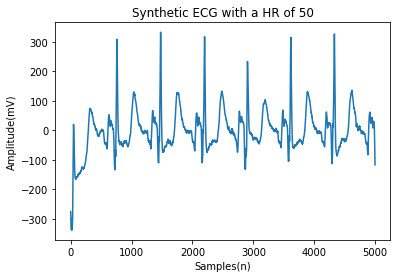

G:\My Drive\Molecool\Databases\Database1\S0366\holter\Snippet001


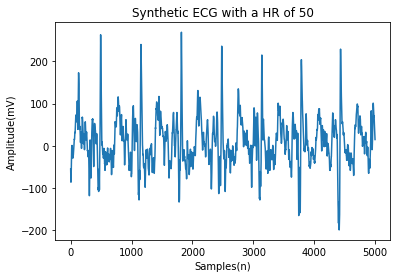

G:\My Drive\Molecool\Databases\Database1\S0366\holter\Snippet002


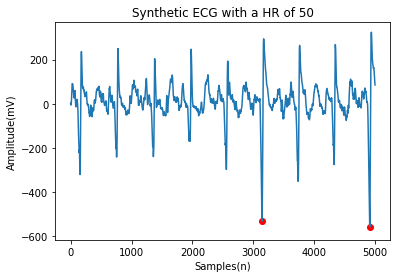

G:\My Drive\Molecool\Databases\Database1\S0366\holter\Snippet003


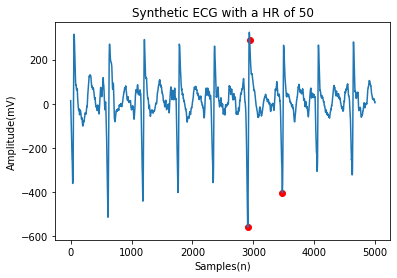







 54%|████████████████████████████████████████████▌                                     | 31/57 [00:11<00:10,  2.44it/s]

G:\My Drive\Molecool\Databases\Database1\S0368\holter\Snippet000


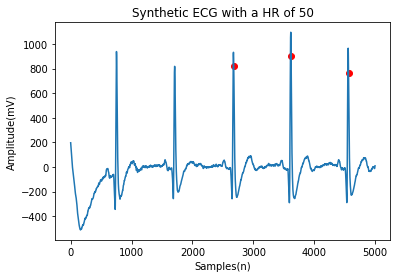

G:\My Drive\Molecool\Databases\Database1\S0368\holter\Snippet001


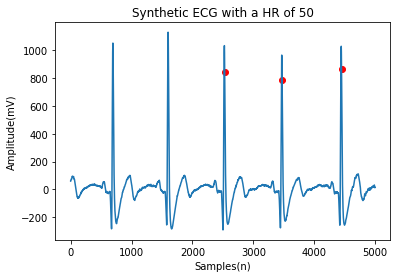

G:\My Drive\Molecool\Databases\Database1\S0368\holter\Snippet002


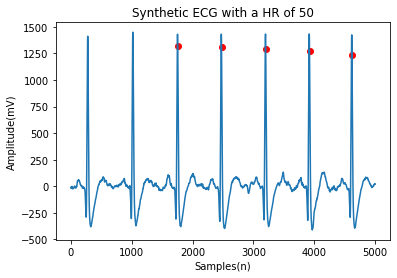







 56%|██████████████████████████████████████████████                                    | 32/57 [00:11<00:10,  2.39it/s]

G:\My Drive\Molecool\Databases\Database1\S0372\holter\Snippet000


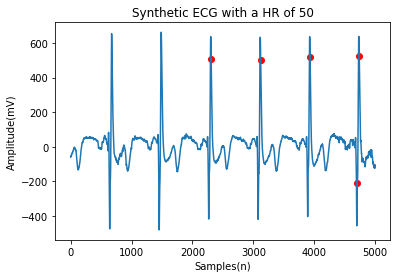

G:\My Drive\Molecool\Databases\Database1\S0372\holter\Snippet001


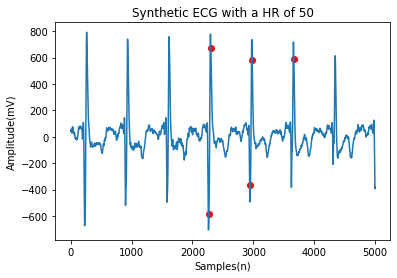

G:\My Drive\Molecool\Databases\Database1\S0372\holter\Snippet002


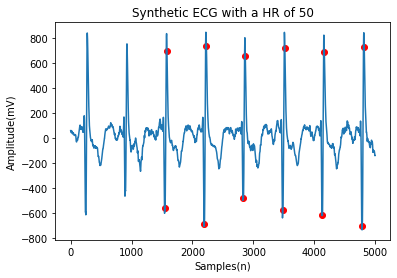







 58%|███████████████████████████████████████████████▍                                  | 33/57 [00:12<00:10,  2.31it/s]

G:\My Drive\Molecool\Databases\Database1\S0381\holter\Snippet000


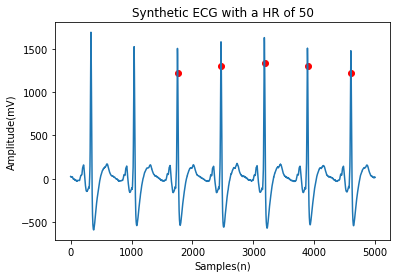

G:\My Drive\Molecool\Databases\Database1\S0381\holter\Snippet001


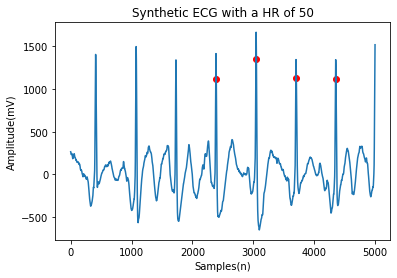

G:\My Drive\Molecool\Databases\Database1\S0381\holter\Snippet002


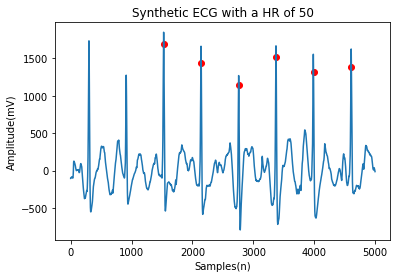







 60%|████████████████████████████████████████████████▉                                 | 34/57 [00:12<00:10,  2.23it/s]

G:\My Drive\Molecool\Databases\Database1\S0382\holter\Snippet000


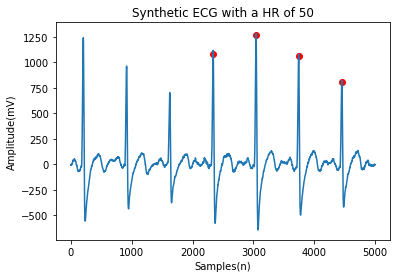







 61%|██████████████████████████████████████████████████▎                               | 35/57 [00:12<00:07,  2.80it/s]

G:\My Drive\Molecool\Databases\Database1\S0390\holter\Snippet000


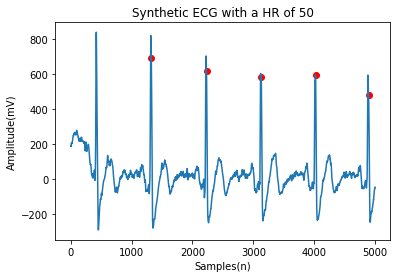

G:\My Drive\Molecool\Databases\Database1\S0390\holter\Snippet001


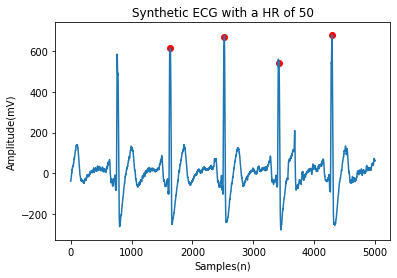

G:\My Drive\Molecool\Databases\Database1\S0390\holter\Snippet002


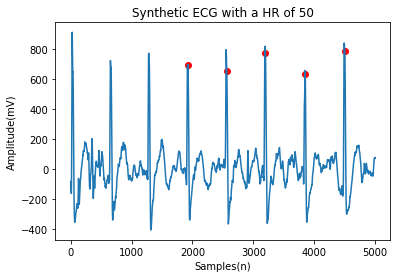







 63%|███████████████████████████████████████████████████▊                              | 36/57 [00:13<00:08,  2.61it/s]

G:\My Drive\Molecool\Databases\Database1\S0392\holter\Snippet000


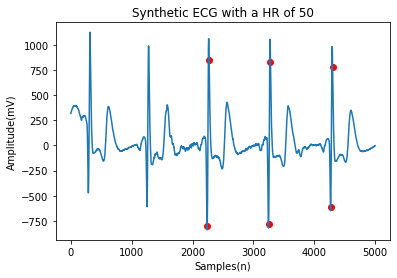

G:\My Drive\Molecool\Databases\Database1\S0392\holter\Snippet001


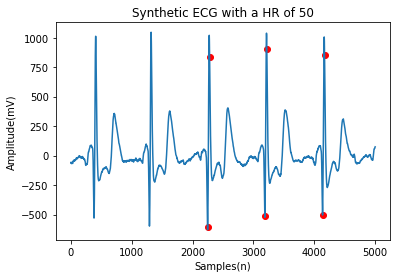

G:\My Drive\Molecool\Databases\Database1\S0392\holter\Snippet002


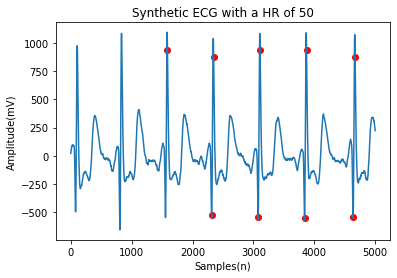







 65%|█████████████████████████████████████████████████████▏                            | 37/57 [00:13<00:07,  2.52it/s]

G:\My Drive\Molecool\Databases\Database1\S0398\holter\Snippet000


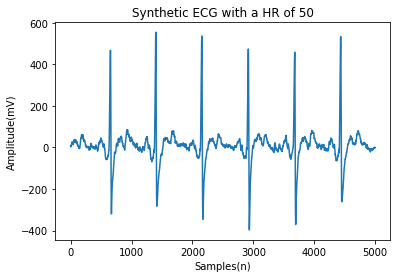

G:\My Drive\Molecool\Databases\Database1\S0398\holter\Snippet001


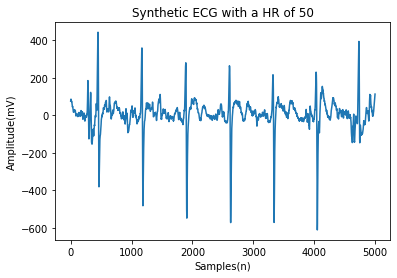







 67%|██████████████████████████████████████████████████████▋                           | 38/57 [00:13<00:06,  2.80it/s]

G:\My Drive\Molecool\Databases\Database1\S0403\holter\Snippet000


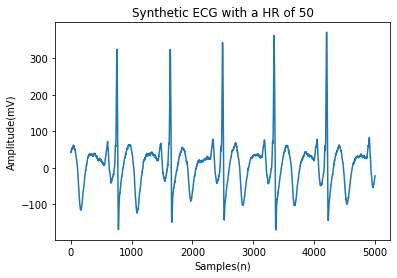

G:\My Drive\Molecool\Databases\Database1\S0403\holter\Snippet001


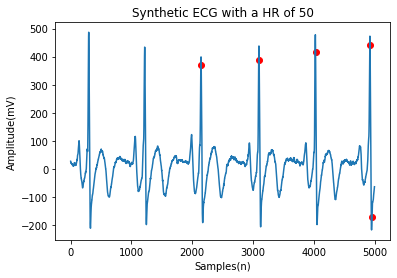

G:\My Drive\Molecool\Databases\Database1\S0403\holter\Snippet002


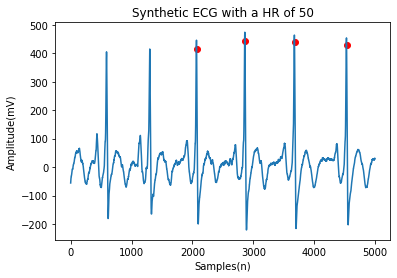

G:\My Drive\Molecool\Databases\Database1\S0403\holter\Snippet003


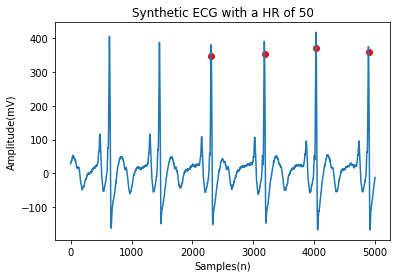

G:\My Drive\Molecool\Databases\Database1\S0403\holter\Snippet004


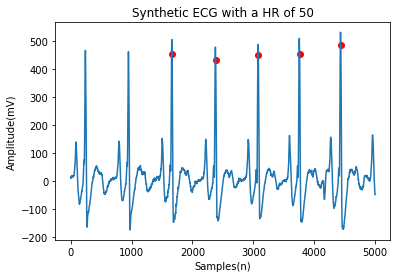







 68%|████████████████████████████████████████████████████████                          | 39/57 [00:14<00:08,  2.06it/s]

G:\My Drive\Molecool\Databases\Database1\S0405\holter\Snippet000


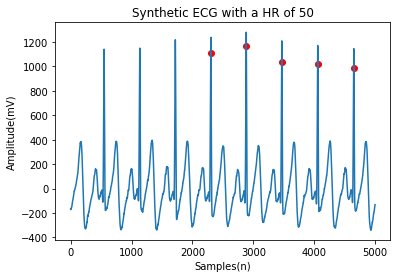

G:\My Drive\Molecool\Databases\Database1\S0405\holter\Snippet001


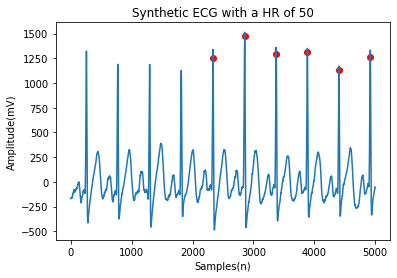

G:\My Drive\Molecool\Databases\Database1\S0405\holter\Snippet002


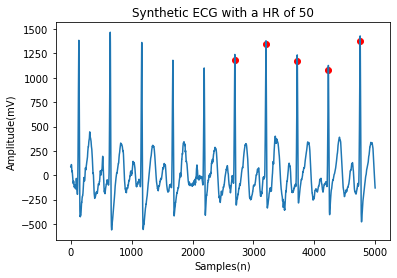







 70%|█████████████████████████████████████████████████████████▌                        | 40/57 [00:15<00:08,  2.12it/s]

G:\My Drive\Molecool\Databases\Database1\S0406\holter\Snippet000


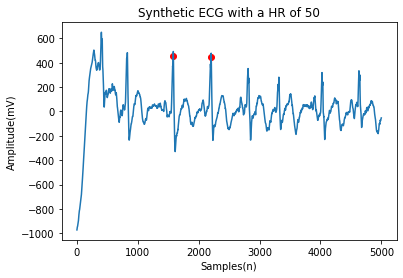

G:\My Drive\Molecool\Databases\Database1\S0406\holter\Snippet001


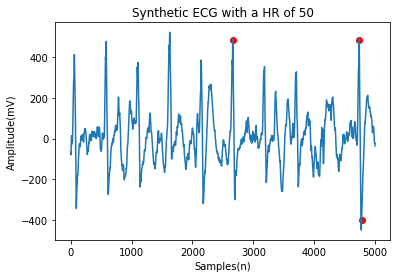

G:\My Drive\Molecool\Databases\Database1\S0406\holter\Snippet002


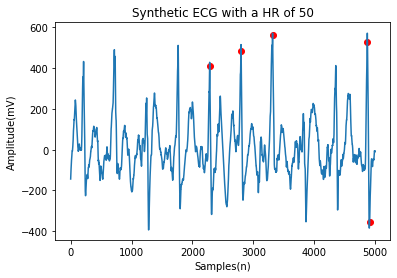







 72%|██████████████████████████████████████████████████████████▉                       | 41/57 [00:15<00:07,  2.12it/s]

G:\My Drive\Molecool\Databases\Database1\S0409\holter\Snippet000


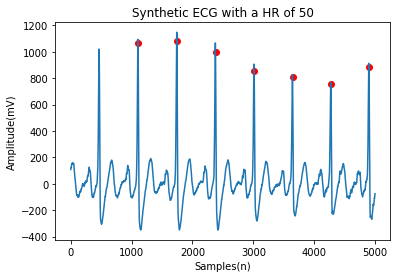







 74%|████████████████████████████████████████████████████████████▍                     | 42/57 [00:15<00:05,  2.65it/s]

G:\My Drive\Molecool\Databases\Database1\S0416\holter\Snippet000


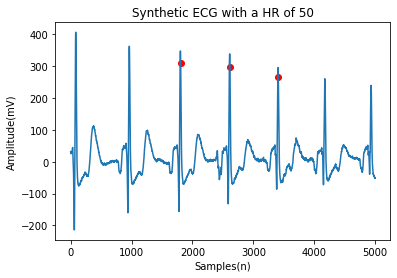

G:\My Drive\Molecool\Databases\Database1\S0416\holter\Snippet001


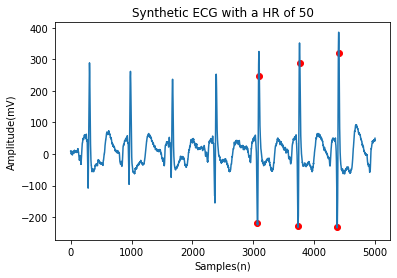

G:\My Drive\Molecool\Databases\Database1\S0416\holter\Snippet002


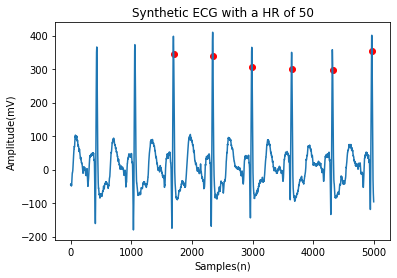

G:\My Drive\Molecool\Databases\Database1\S0416\holter\Snippet003


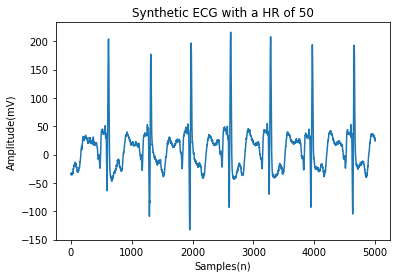

G:\My Drive\Molecool\Databases\Database1\S0416\holter\Snippet004


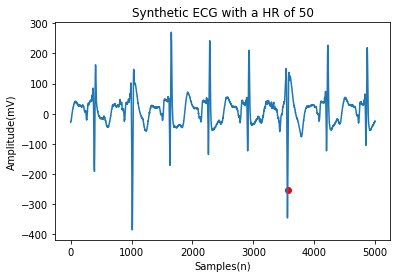







 77%|███████████████████████████████████████████████████████████████▎                  | 44/57 [00:16<00:04,  2.69it/s]

G:\My Drive\Molecool\Databases\Database1\S0420\holter\Snippet000


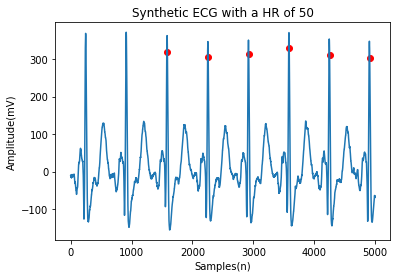

G:\My Drive\Molecool\Databases\Database1\S0420\holter\Snippet001


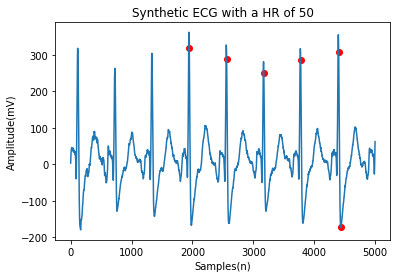

G:\My Drive\Molecool\Databases\Database1\S0420\holter\Snippet002


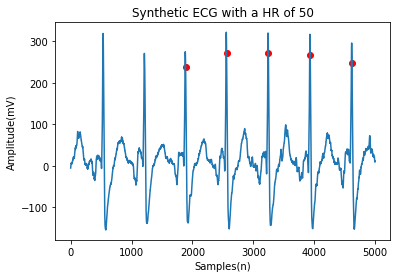

G:\My Drive\Molecool\Databases\Database1\S0420\holter\Snippet003


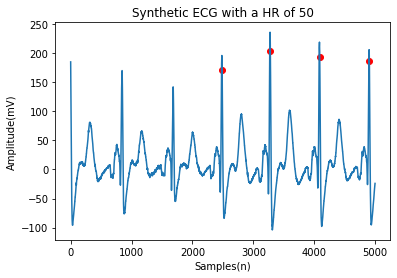

G:\My Drive\Molecool\Databases\Database1\S0420\holter\Snippet004


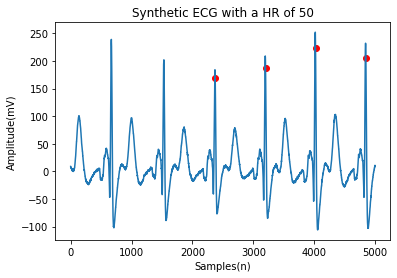







 79%|████████████████████████████████████████████████████████████████▋                 | 45/57 [00:17<00:05,  2.03it/s]

G:\My Drive\Molecool\Databases\Database1\S0423\holter\Snippet000


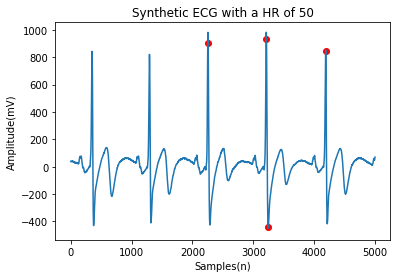

G:\My Drive\Molecool\Databases\Database1\S0423\holter\Snippet001


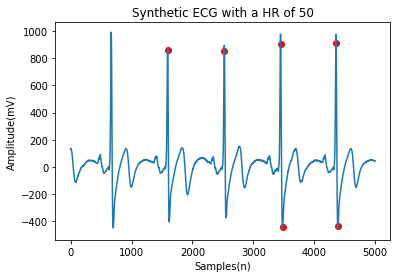

G:\My Drive\Molecool\Databases\Database1\S0423\holter\Snippet002


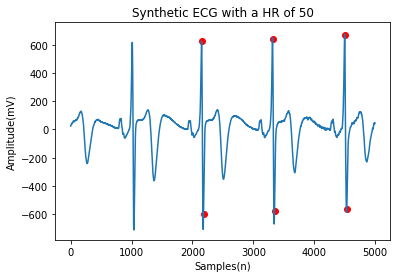

G:\My Drive\Molecool\Databases\Database1\S0423\holter\Snippet003


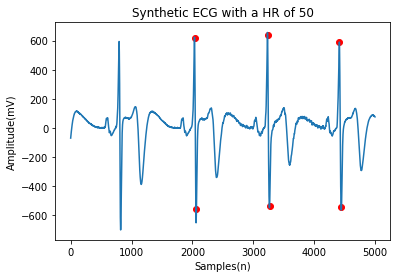

G:\My Drive\Molecool\Databases\Database1\S0423\holter\Snippet004


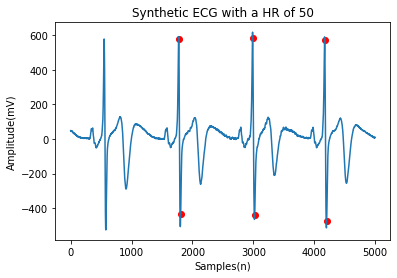







 81%|██████████████████████████████████████████████████████████████████▏               | 46/57 [00:18<00:06,  1.72it/s]

G:\My Drive\Molecool\Databases\Database1\S0424\holter\Snippet000


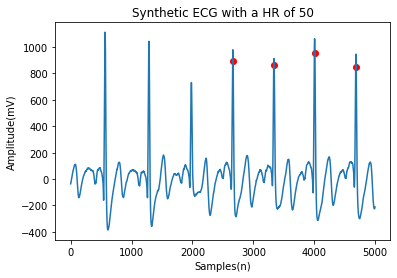

G:\My Drive\Molecool\Databases\Database1\S0424\holter\Snippet001


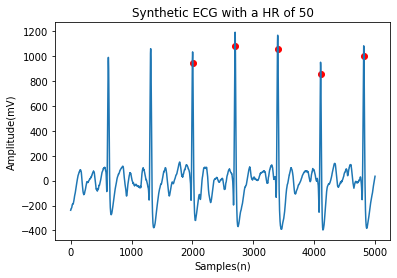







 82%|███████████████████████████████████████████████████████████████████▌              | 47/57 [00:18<00:04,  2.00it/s]

G:\My Drive\Molecool\Databases\Database1\S0426\holter\Snippet000


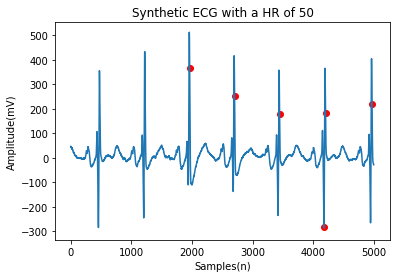

G:\My Drive\Molecool\Databases\Database1\S0426\holter\Snippet001


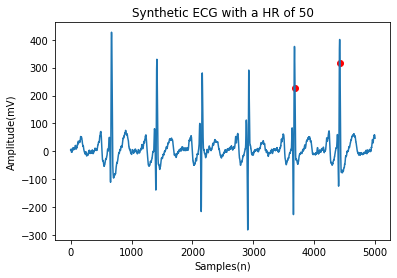

G:\My Drive\Molecool\Databases\Database1\S0426\holter\Snippet002


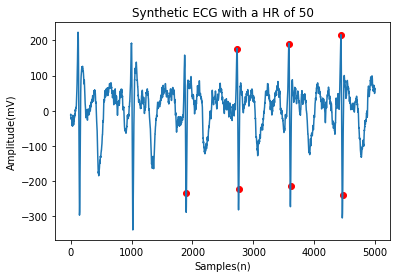

G:\My Drive\Molecool\Databases\Database1\S0426\holter\Snippet003


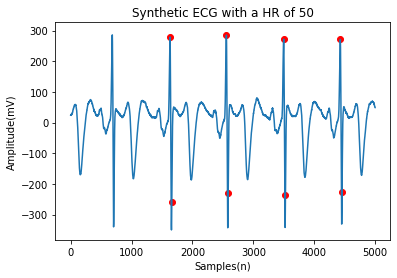

G:\My Drive\Molecool\Databases\Database1\S0426\holter\Snippet004


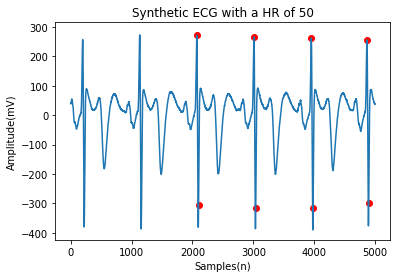







 84%|█████████████████████████████████████████████████████████████████████             | 48/57 [00:19<00:05,  1.66it/s]

G:\My Drive\Molecool\Databases\Database1\S0427\holter\Snippet000


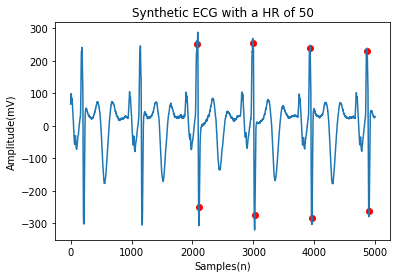

G:\My Drive\Molecool\Databases\Database1\S0427\holter\Snippet001


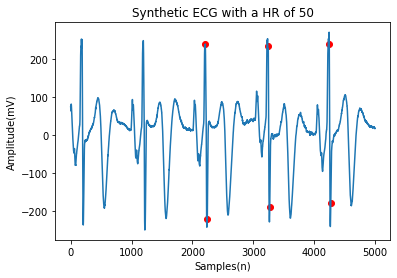

G:\My Drive\Molecool\Databases\Database1\S0427\holter\Snippet002


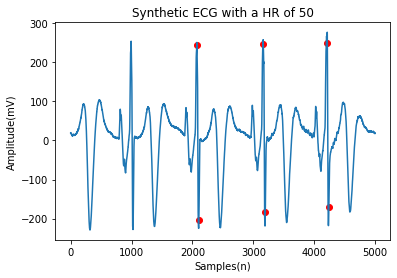

G:\My Drive\Molecool\Databases\Database1\S0427\holter\Snippet003


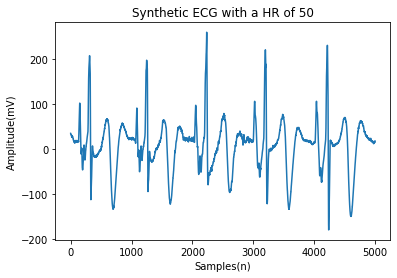

G:\My Drive\Molecool\Databases\Database1\S0427\holter\Snippet004


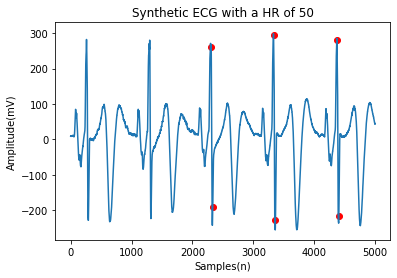







 86%|██████████████████████████████████████████████████████████████████████▍           | 49/57 [00:19<00:05,  1.57it/s]

G:\My Drive\Molecool\Databases\Database1\S0430\holter\Snippet000


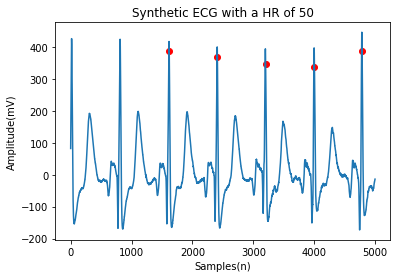

G:\My Drive\Molecool\Databases\Database1\S0430\holter\Snippet001


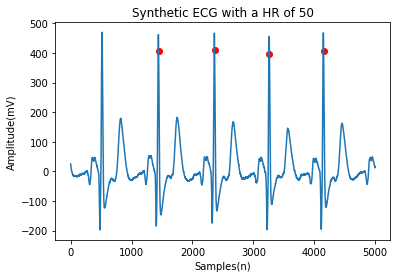

G:\My Drive\Molecool\Databases\Database1\S0430\holter\Snippet002


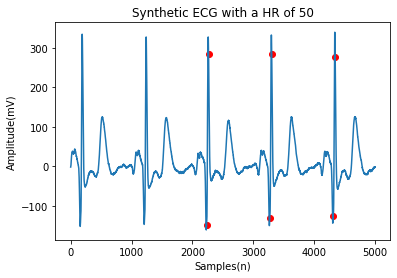

G:\My Drive\Molecool\Databases\Database1\S0430\holter\Snippet003


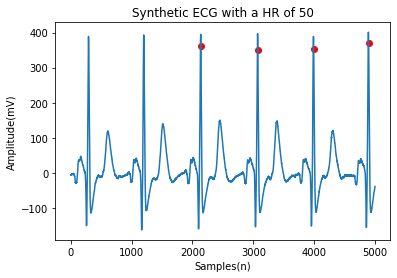

G:\My Drive\Molecool\Databases\Database1\S0430\holter\Snippet004


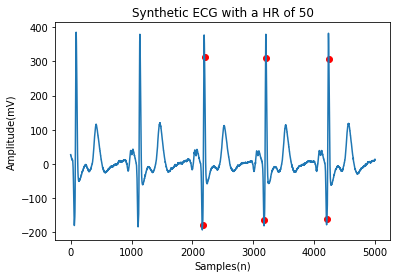







 88%|███████████████████████████████████████████████████████████████████████▉          | 50/57 [00:20<00:04,  1.49it/s]

G:\My Drive\Molecool\Databases\Database1\S0432\holter\Snippet000


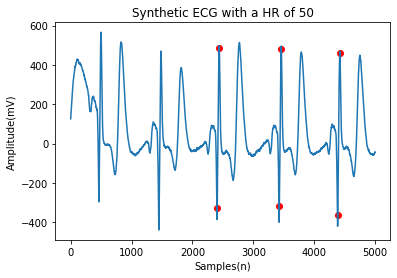

G:\My Drive\Molecool\Databases\Database1\S0432\holter\Snippet001


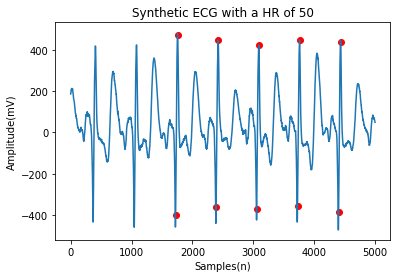

G:\My Drive\Molecool\Databases\Database1\S0432\holter\Snippet002


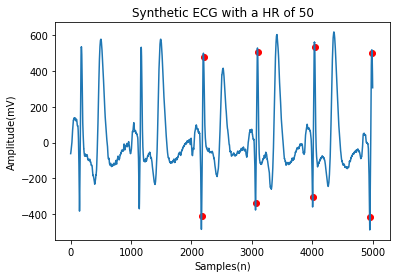

G:\My Drive\Molecool\Databases\Database1\S0432\holter\Snippet003


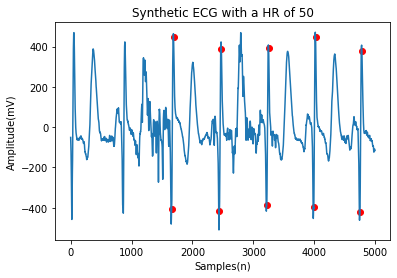

G:\My Drive\Molecool\Databases\Database1\S0432\holter\Snippet004


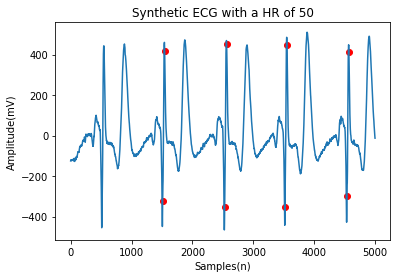







 89%|█████████████████████████████████████████████████████████████████████████▎        | 51/57 [00:21<00:04,  1.40it/s]

G:\My Drive\Molecool\Databases\Database1\S0433\holter\Snippet000


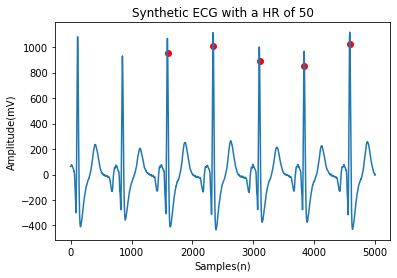

G:\My Drive\Molecool\Databases\Database1\S0433\holter\Snippet001


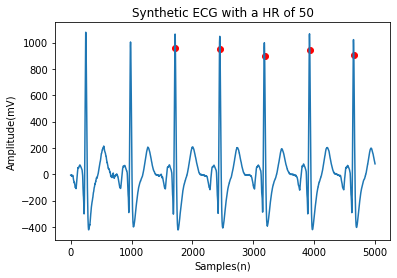

G:\My Drive\Molecool\Databases\Database1\S0433\holter\Snippet002


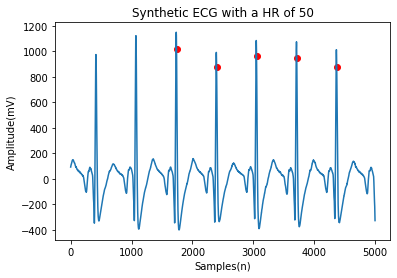

G:\My Drive\Molecool\Databases\Database1\S0433\holter\Snippet003


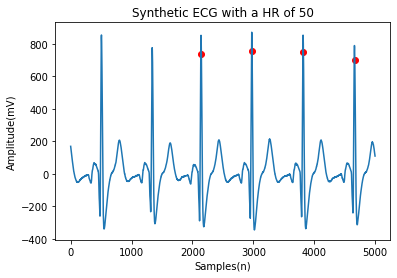

G:\My Drive\Molecool\Databases\Database1\S0433\holter\Snippet004


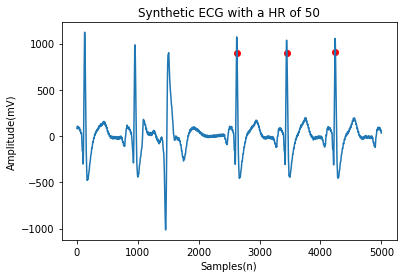







 91%|██████████████████████████████████████████████████████████████████████████▊       | 52/57 [00:22<00:03,  1.37it/s]

G:\My Drive\Molecool\Databases\Database1\S0434\holter\Snippet000


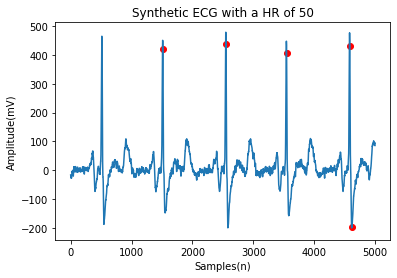

G:\My Drive\Molecool\Databases\Database1\S0434\holter\Snippet001


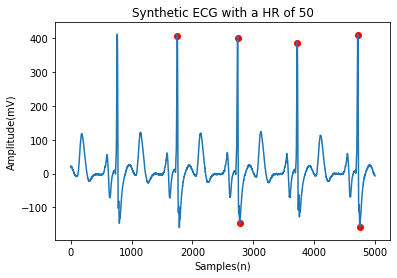

G:\My Drive\Molecool\Databases\Database1\S0434\holter\Snippet002


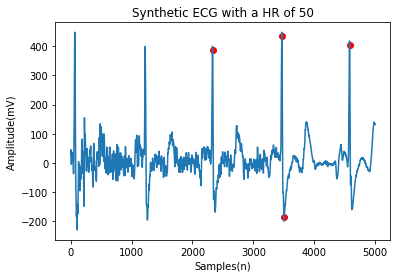

G:\My Drive\Molecool\Databases\Database1\S0434\holter\Snippet003


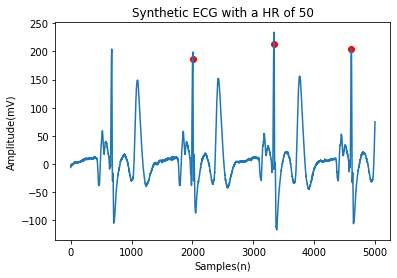

G:\My Drive\Molecool\Databases\Database1\S0434\holter\Snippet004


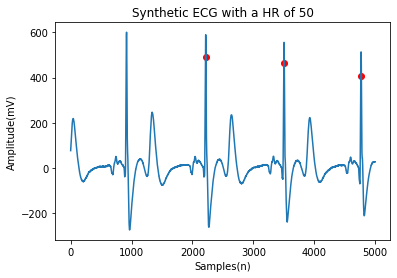







 93%|████████████████████████████████████████████████████████████████████████████▏     | 53/57 [00:23<00:03,  1.32it/s]

G:\My Drive\Molecool\Databases\Database1\S0435\holter\Snippet000


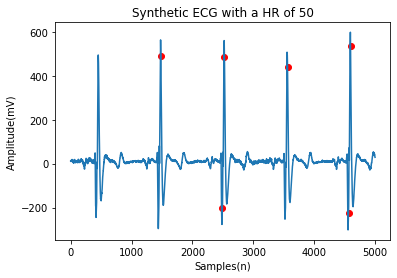

G:\My Drive\Molecool\Databases\Database1\S0435\holter\Snippet001


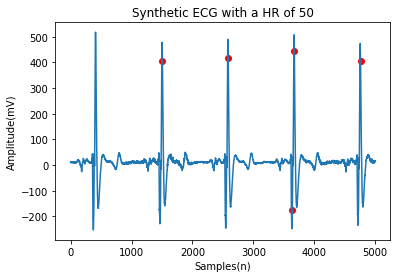

G:\My Drive\Molecool\Databases\Database1\S0435\holter\Snippet002


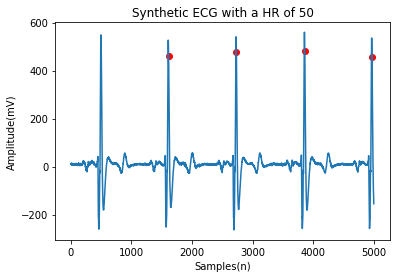

G:\My Drive\Molecool\Databases\Database1\S0435\holter\Snippet003


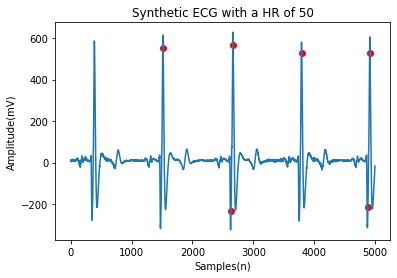

G:\My Drive\Molecool\Databases\Database1\S0435\holter\Snippet004


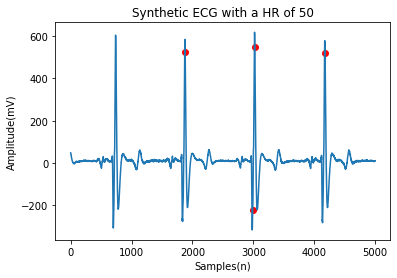







 95%|█████████████████████████████████████████████████████████████████████████████▋    | 54/57 [00:23<00:02,  1.28it/s]

G:\My Drive\Molecool\Databases\Database1\S0441\holter\Snippet000


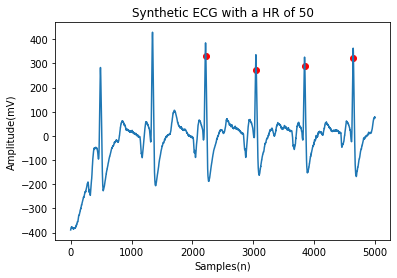

G:\My Drive\Molecool\Databases\Database1\S0441\holter\Snippet001


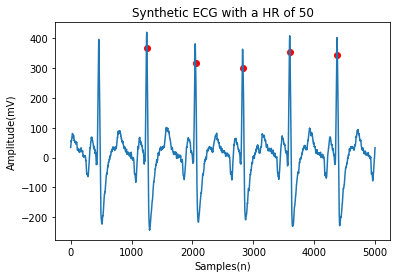

G:\My Drive\Molecool\Databases\Database1\S0441\holter\Snippet002


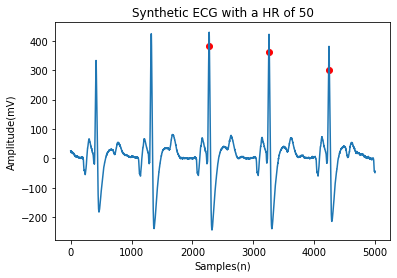

G:\My Drive\Molecool\Databases\Database1\S0441\holter\Snippet003


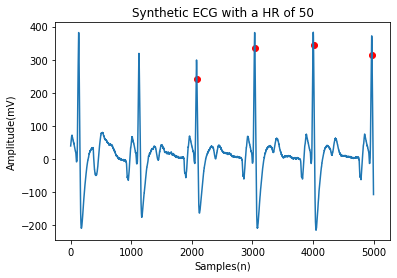

G:\My Drive\Molecool\Databases\Database1\S0441\holter\Snippet004


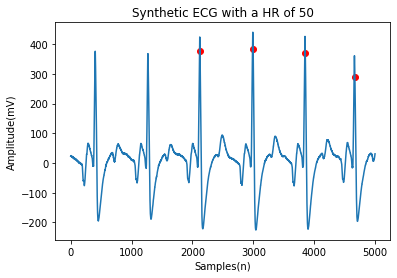







100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [00:24<00:00,  2.31it/s]


In [50]:
# Check to see the state of the peaks
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini')):
        path_pat = root+'\\'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini'):
                path_folder = path_pat + '\\' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini')):
                        path_snip =path_folder + '\\' + snip_folder
                        df = pd.read_feather(path_snip + '\\MSNIP.ftr')
                        print(path_snip)
                        df_signal = df['ecg_0']
                        df_peaks = pd.read_feather(path_snip + '\\PEAKS.ftr')
                        
                        y_values = []
                        for point in df_peaks['x_values']:
                            if point > 0 and point < 5000:
                                y_values.append(df_signal[point])

                        #print(y_values)
                        #print(df_peaks[df_peaks['x_values'] < 5000])

                        plt.plot(df_signal[0:5000])
                        plt.title('Synthetic ECG with a HR of 50')
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks[df_peaks['x_values'] < 5000]['x_values'],y_values,marker='o',c='red')
                        plt.show()